<a href="https://colab.research.google.com/github/Suryanshu-Pugla/INDE-577--Data-Science-Machine-Learning/blob/main/Supervised%20Learning/8.%20Random%20Forest/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Step 1: Load MNIST Dataset
print("Loading MNIST Dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)  # Load MNIST data
X = mnist.data  # Features (pixel values)
y = mnist.target.astype(int)  # Target (digit labels)

print("Dataset Loaded Successfully!")
print(f"Feature Shape: {X.shape}, Target Shape: {y.shape}")

Loading MNIST Dataset...
Dataset Loaded Successfully!
Feature Shape: (70000, 784), Target Shape: (70000,)


In [8]:
# Step 2: Preprocess the Data
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 3: Train the Random Forest Classifier
print("Training Random Forest Classifier...")
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
rf_clf.fit(X_train, y_train)
print("Model Training Complete!")

Training Random Forest Classifier...
Model Training Complete!


In [10]:
# Step 4: Model Evaluation
print("Evaluating the Model...")
y_pred = rf_clf.predict(X_test)

Evaluating the Model...


In [11]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Model Accuracy: 0.97
Confusion Matrix:
 [[1325    0    5    0    1    1    2    1    7    1]
 [   0 1574    5    8    2    1    0    5    3    2]
 [   6    2 1337    4    6    0    7    7   10    1]
 [   0    0   22 1360    1   12    1   14   14    9]
 [   2    0    4    0 1245    1    3    3    3   34]
 [   3    3    1   20    4 1219    9    1   10    3]
 [   5    1    0    0    6    9 1371    0    4    0]
 [   4    5   22    0    5    0    0 1447    2   18]
 [   1    7   12   14    7    6    8    4 1287   11]
 [   5    6    2   11   16    6    1   12   13 1348]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.98   

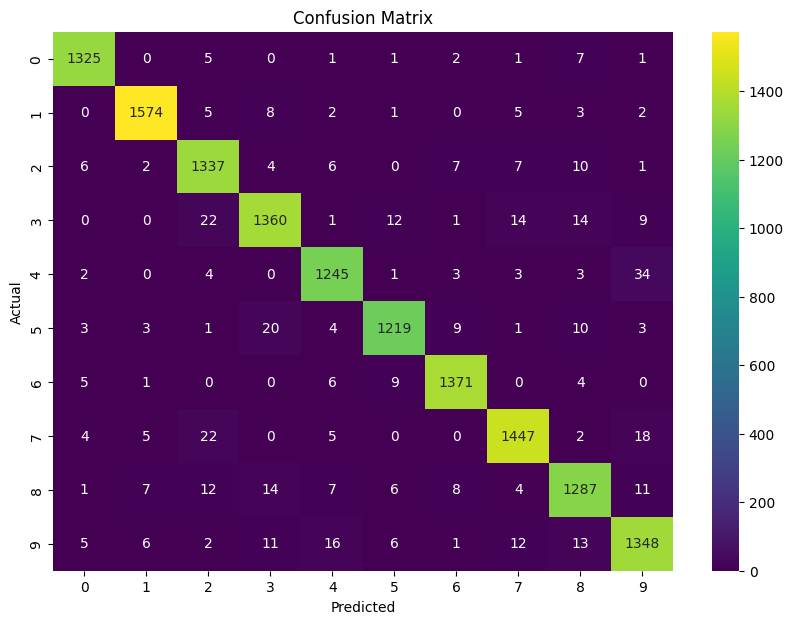

In [12]:
# Step 5: Visualize Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

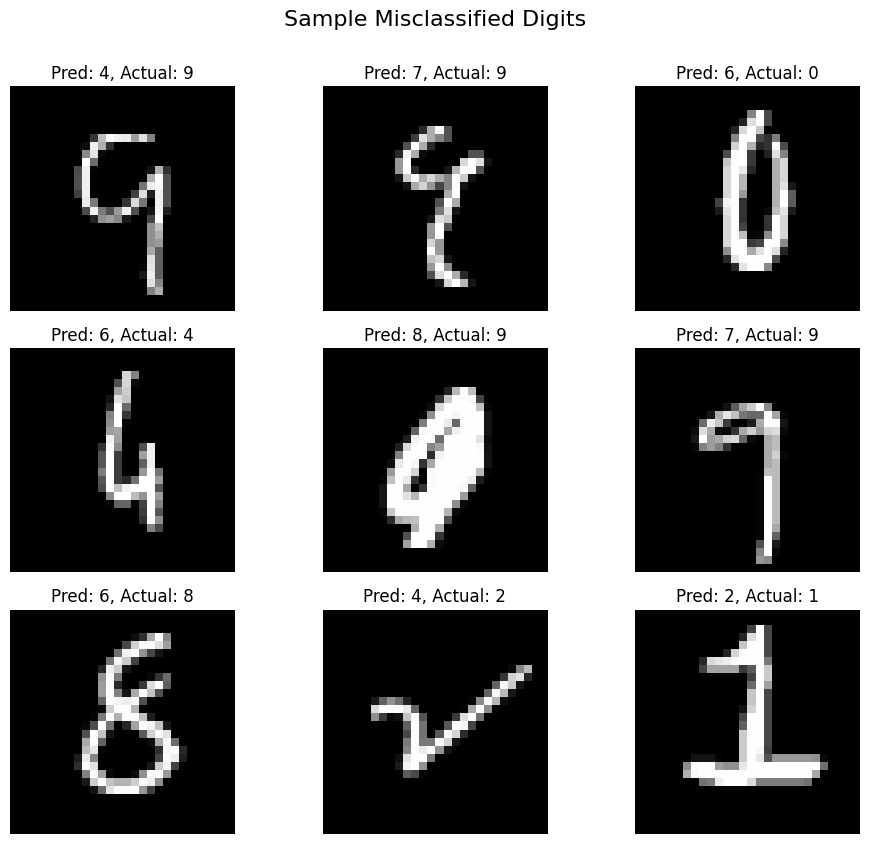

In [13]:
# Step 6: Visualize Misclassified Digits
misclassified_indices = np.where(y_test != y_pred)[0]
plt.figure(figsize=(10, 8))

for i, index in enumerate(misclassified_indices[:9]):  # Show 9 misclassified digits
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[index]}, Actual: {y_test[index]}")
    plt.axis("off")

plt.tight_layout()
plt.suptitle("Sample Misclassified Digits", fontsize=16, y=1.05)
plt.show()
